In [0]:
host = "35.202.134.206"
port = 5432
db   = "postgres"
user = "postgres"
pwd  = "We<3ProfKerger25"

jdbc_url = f"jdbc:postgresql://{host}:{port}/{db}"

test = (spark.read.format("jdbc")
  .option("url", jdbc_url)
  .option("query", "select 1 as ok")
  .option("user", user)
  .option("password", pwd)
  .option("driver", "org.postgresql.Driver")
  .load()
)
display(test)

ok
1


In [0]:
target_db = "olap_import"
spark.sql(f"CREATE DATABASE IF NOT EXISTS {target_db}")

DataFrame[]

In [0]:
tables = [
    "interactions",
    "content",
    "places",
    "property",
    "users"
]

for t in tables:
    print(f"Importing {t} ...")

    df = (spark.read.format("jdbc")
        .option("url", jdbc_url)
        .option("dbtable", f"public.{t}")
        .option("user", user)
        .option("password", pwd)
        .option("driver", "org.postgresql.Driver")
        .load()
    )

    (df.write
      .mode("overwrite")
      .format("delta")
      .saveAsTable(f"{target_db}.{t}")
    )

print("All tables imported.")


Importing interactions ...
Importing content ...
Importing places ...
Importing property ...
Importing users ...
All tables imported.


In [0]:
for t in tables:
    cnt = spark.sql(f"SELECT COUNT(*) AS c FROM {target_db}.{t}").collect()[0]["c"]
    print(t, cnt)


interactions 172644
content 59976
places 53520
property 33
users 4322


### Analysis 1: Content Engagement Analysis

Question: Which content items generate the most engagement, and how does engagement evolve over time?

In [0]:
%sql
SELECT
    c.id AS content_id,
    COUNT(i.id) AS interaction_count
FROM olap_import.interactions i
JOIN olap_import.content c
  ON i.content_id = c.id
GROUP BY c.id
ORDER BY interaction_count DESC

content_id,interaction_count
1,2145
5,691
5446,334
9094,270
7462,252
12864,240
14370,224
3644,224
3541,208
47407,200


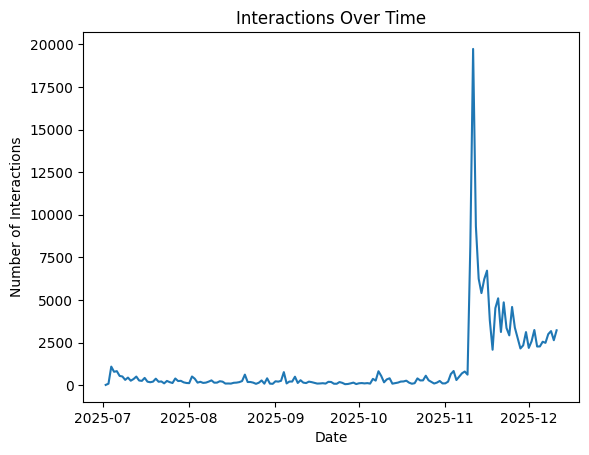

In [0]:
df = spark.sql("""
SELECT
    DATE(created_at) AS interaction_date,
    COUNT(*) AS interaction_count
FROM olap_import.interactions
GROUP BY DATE(created_at)
ORDER BY interaction_date
""").toPandas()

import matplotlib.pyplot as plt

plt.figure()
plt.plot(df["interaction_date"], df["interaction_count"])
plt.title("Interactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Interactions")
plt.xticks()
plt.show()



## Analysis 2: User Engagement Intensity Prediction

Can we predict how active a user will be (low/medium/high engagement) based on their historical behavior and context?

In [0]:
%sql
CREATE OR REPLACE TEMP VIEW user_engagement_features AS
SELECT
    u.id AS user_id,
    p.country_code,
    COUNT(i.id)                           AS total_interactions,
    COUNT(DISTINCT i.content_id)          AS distinct_content,
    COUNT(DISTINCT i.property_id)         AS distinct_property,
    COUNT(DISTINCT i.place_id)            AS distinct_places
FROM olap_import.users u
LEFT JOIN olap_import.interactions i
  ON u.id = i.user_id
LEFT JOIN olap_import.places p
  ON i.place_id = p.id
GROUP BY u.id, p.country_code


In [0]:
from pyspark.sql import functions as F

df = spark.sql("SELECT * FROM user_engagement_features")

# define engagement buckets using quantiles
quantiles = df.approxQuantile("total_interactions", [0.33, 0.66], 0.01)
q1, q2 = quantiles

df = df.withColumn(
    "engagement_level",
    F.when(F.col("total_interactions") <= q1, 0)
     .when(F.col("total_interactions") <= q2, 1)
     .otherwise(2)
)

# check class balance
df.groupBy("engagement_level").count().show()


+----------------+-----+
|engagement_level|count|
+----------------+-----+
|               1| 2645|
|               2| 3014|
|               0| 3731|
+----------------+-----+



In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

indexer_country = StringIndexer(
    inputCol="country_code",
    outputCol="country_idx",
    handleInvalid="keep"
)

assembler = VectorAssembler(
    inputCols=[
        "total_interactions",
        "distinct_content",
        "distinct_property",
        "distinct_places",
        "country_idx"
    ],
    outputCol="features"
)

lr = LogisticRegression(
    labelCol="engagement_level",
    featuresCol="features",
    maxIter=50
)

pipeline = Pipeline(stages=[indexer_country, assembler, lr])
model = pipeline.fit(df)


In [0]:
pred = model.transform(df)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol="engagement_level",
    predictionCol="prediction",
    metricName="accuracy"
)

accuracy = evaluator.evaluate(pred)
accuracy


0.9915867944621938

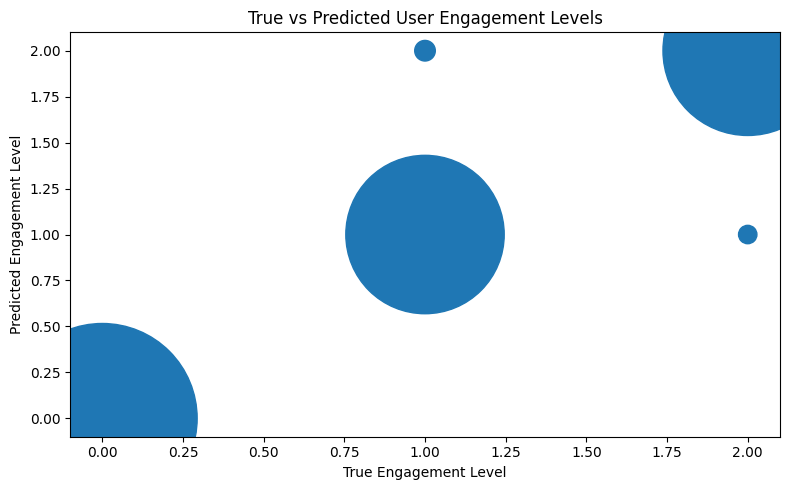

In [0]:
pdf = (pred
       .groupBy("engagement_level", "prediction")
       .count()
       .toPandas())

plt.figure(figsize=(8, 5))
plt.scatter(pdf["engagement_level"], pdf["prediction"], s=pdf["count"] * 5)
plt.title("True vs Predicted User Engagement Levels")
plt.xlabel("True Engagement Level")
plt.ylabel("Predicted Engagement Level")
plt.tight_layout()
plt.show()


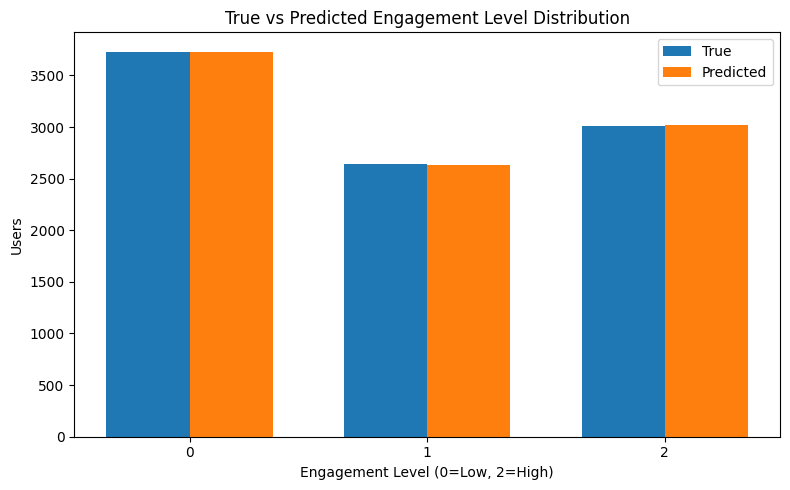

In [0]:
# aggregate true and predicted counts
pdf = (pred
       .groupBy("engagement_level", "prediction")
       .count()
       .toPandas())

# total true counts
true_counts = (pdf
               .groupby("engagement_level")["count"]
               .sum()
               .reset_index()
               .rename(columns={"engagement_level": "level", "count": "true_count"}))

# total predicted counts
pred_counts = (pdf
               .groupby("prediction")["count"]
               .sum()
               .reset_index()
               .rename(columns={"prediction": "level", "count": "pred_count"}))

# merge
merged = true_counts.merge(pred_counts, on="level", how="outer").fillna(0)
merged = merged.sort_values("level")

x = np.arange(len(merged))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, merged["true_count"], width, label="True")
plt.bar(x + width/2, merged["pred_count"], width, label="Predicted")

plt.xticks(x, merged["level"])
plt.xlabel("Engagement Level (0=Low, 2=High)")
plt.ylabel("Users")
plt.title("True vs Predicted Engagement Level Distribution")
plt.legend()
plt.tight_layout()
plt.show()



### Analysis 3: User Similarity Matrix


In [0]:
%sql
WITH user_places AS (
  SELECT DISTINCT user_id, place_id
  FROM olap_import.interactions
  WHERE place_id IS NOT NULL
),

user_place_counts AS (
  SELECT user_id, COUNT(*) AS place_cnt
  FROM user_places
  GROUP BY user_id
),

active_users AS (
  SELECT user_id
  FROM user_place_counts
  WHERE place_cnt >= 5
),

user_pair_intersections AS (
  SELECT
    a.user_id AS user_a_id,
    b.user_id AS user_b_id,
    COUNT(*)  AS common_places
  FROM user_places a
  JOIN user_places b
    ON a.place_id = b.place_id
   AND a.user_id < b.user_id
  JOIN active_users au1 ON a.user_id = au1.user_id
  JOIN active_users au2 ON b.user_id = au2.user_id
  GROUP BY a.user_id, b.user_id
  HAVING COUNT(*) >= 3
)

SELECT
  upi.user_a_id,
  upi.user_b_id,
  upi.common_places,
  ROUND(
    upi.common_places / (upa.place_cnt + upb.place_cnt - upi.common_places),
    4
  ) AS jaccard_similarity
FROM user_pair_intersections upi
JOIN user_place_counts upa ON upi.user_a_id = upa.user_id
JOIN user_place_counts upb ON upi.user_b_id = upb.user_id
ORDER BY jaccard_similarity DESC;


user_a_id,user_b_id,common_places,jaccard_similarity
3537,4143,5,1.0
2629,3206,5,1.0
203,1150,5,1.0
347,526,5,1.0
2433,3065,5,1.0
203,3206,5,1.0
404,4315,5,1.0
2629,3403,5,1.0
3515,3882,5,1.0
281,2356,5,1.0


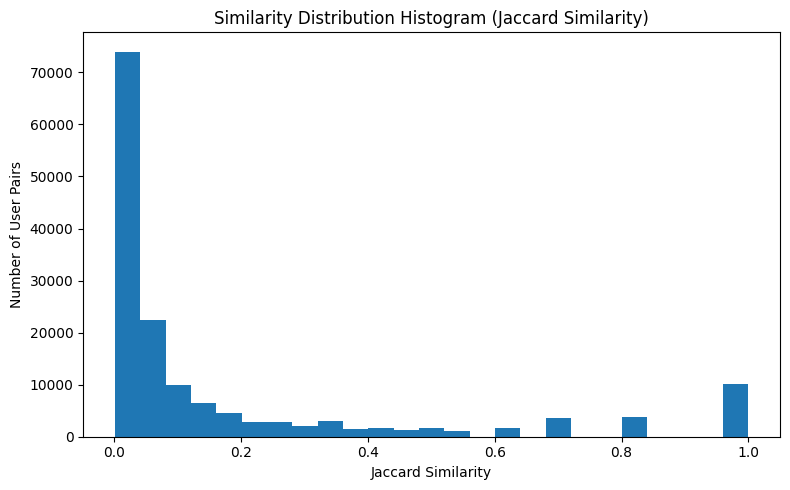

In [0]:
pairs = spark.sql("""WITH user_places AS (
  SELECT DISTINCT user_id, place_id
  FROM olap_import.interactions
  WHERE place_id IS NOT NULL
),

user_place_counts AS (
  SELECT user_id, COUNT(*) AS place_cnt
  FROM user_places
  GROUP BY user_id
),

active_users AS (
  SELECT user_id
  FROM user_place_counts
  WHERE place_cnt >= 5
),

user_pair_intersections AS (
  SELECT
    a.user_id AS user_a_id,
    b.user_id AS user_b_id,
    COUNT(*)  AS common_places
  FROM user_places a
  JOIN user_places b
    ON a.place_id = b.place_id
   AND a.user_id < b.user_id
  JOIN active_users au1 ON a.user_id = au1.user_id
  JOIN active_users au2 ON b.user_id = au2.user_id
  GROUP BY a.user_id, b.user_id
  HAVING COUNT(*) >= 3
)

SELECT
  upi.user_a_id,
  upi.user_b_id,
  upi.common_places,
  ROUND(
    upi.common_places / (upa.place_cnt + upb.place_cnt - upi.common_places),
    4
  ) AS jaccard_similarity
FROM user_pair_intersections upi
JOIN user_place_counts upa ON upi.user_a_id = upa.user_id
JOIN user_place_counts upb ON upi.user_b_id = upb.user_id
ORDER BY jaccard_similarity DESC;
                  """).toPandas()

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(pairs["jaccard_similarity"], bins=25)
plt.title("Similarity Distribution Histogram (Jaccard Similarity)")
plt.xlabel("Jaccard Similarity")
plt.ylabel("Number of User Pairs")
plt.tight_layout()
plt.show()



### Analysis 4: Place Co-occurrence Patterns

Query 1: Find Co-occurring Places

In [0]:
%sql
CREATE OR REPLACE TEMP VIEW top_place_pairs AS
WITH place_savers AS (
  SELECT DISTINCT place_id, user_id
  FROM olap_import.interactions
  WHERE place_id IS NOT NULL
),

place_user_counts AS (
  SELECT
    place_id,
    COUNT(*) AS savers_cnt
  FROM place_savers
  GROUP BY place_id
),

place_pairs AS (
  SELECT
    a.place_id AS place_a_id,
    b.place_id AS place_b_id,
    COUNT(*)   AS co_savers
  FROM place_savers a
  JOIN place_savers b
    ON a.user_id = b.user_id
   AND a.place_id < b.place_id
  GROUP BY a.place_id, b.place_id
  HAVING COUNT(*) >= 3
),

place_pairs_scored AS (
  SELECT
    pp.place_a_id,
    pp.place_b_id,
    pp.co_savers,
    pp.co_savers / (ca.savers_cnt + cb.savers_cnt - pp.co_savers) AS jaccard_similarity
  FROM place_pairs pp
  JOIN place_user_counts ca ON pp.place_a_id = ca.place_id
  JOIN place_user_counts cb ON pp.place_b_id = cb.place_id
)

SELECT
  pps.place_a_id,
  pps.place_b_id,
  pps.co_savers,
  ROUND(pps.jaccard_similarity, 4) AS similarity,
  pa.english_display_name AS place_a_name,
  pb.english_display_name AS place_b_name,
  pa.country_code         AS country
FROM place_pairs_scored pps
JOIN olap_import.places pa ON pps.place_a_id = pa.id
JOIN olap_import.places pb ON pps.place_b_id = pb.id
ORDER BY similarity DESC
LIMIT 50;


Co-occurrence Heatmap

/home/spark-31ff1fe3-4bfa-4553-9cbe-ce/.ipykernel/2494/command-5677738445378542-1321156168:27: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/spark-31ff1fe3-4bfa-4553-9cbe-ce/.ipykernel/2494/command-5677738445378542-1321156168:27: UserWarning: Glyph 23487 (\N{CJK UNIFIED IDEOGRAPH-5BBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/spark-31ff1fe3-4bfa-4553-9cbe-ce/.ipykernel/2494/command-5677738445378542-1321156168:27: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/spark-31ff1fe3-4bfa-4553-9cbe-ce/.ipykernel/2494/command-5677738445378542-1321156168:27: UserWarning: Glyph 28580 (\N{CJK UNIFIED IDEOGRAPH-6FA4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/spark-31ff1fe3-4bfa-4553-9cbe-ce/.ipykernel/2494/command-5677738445378542-1321156168:27: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from fo

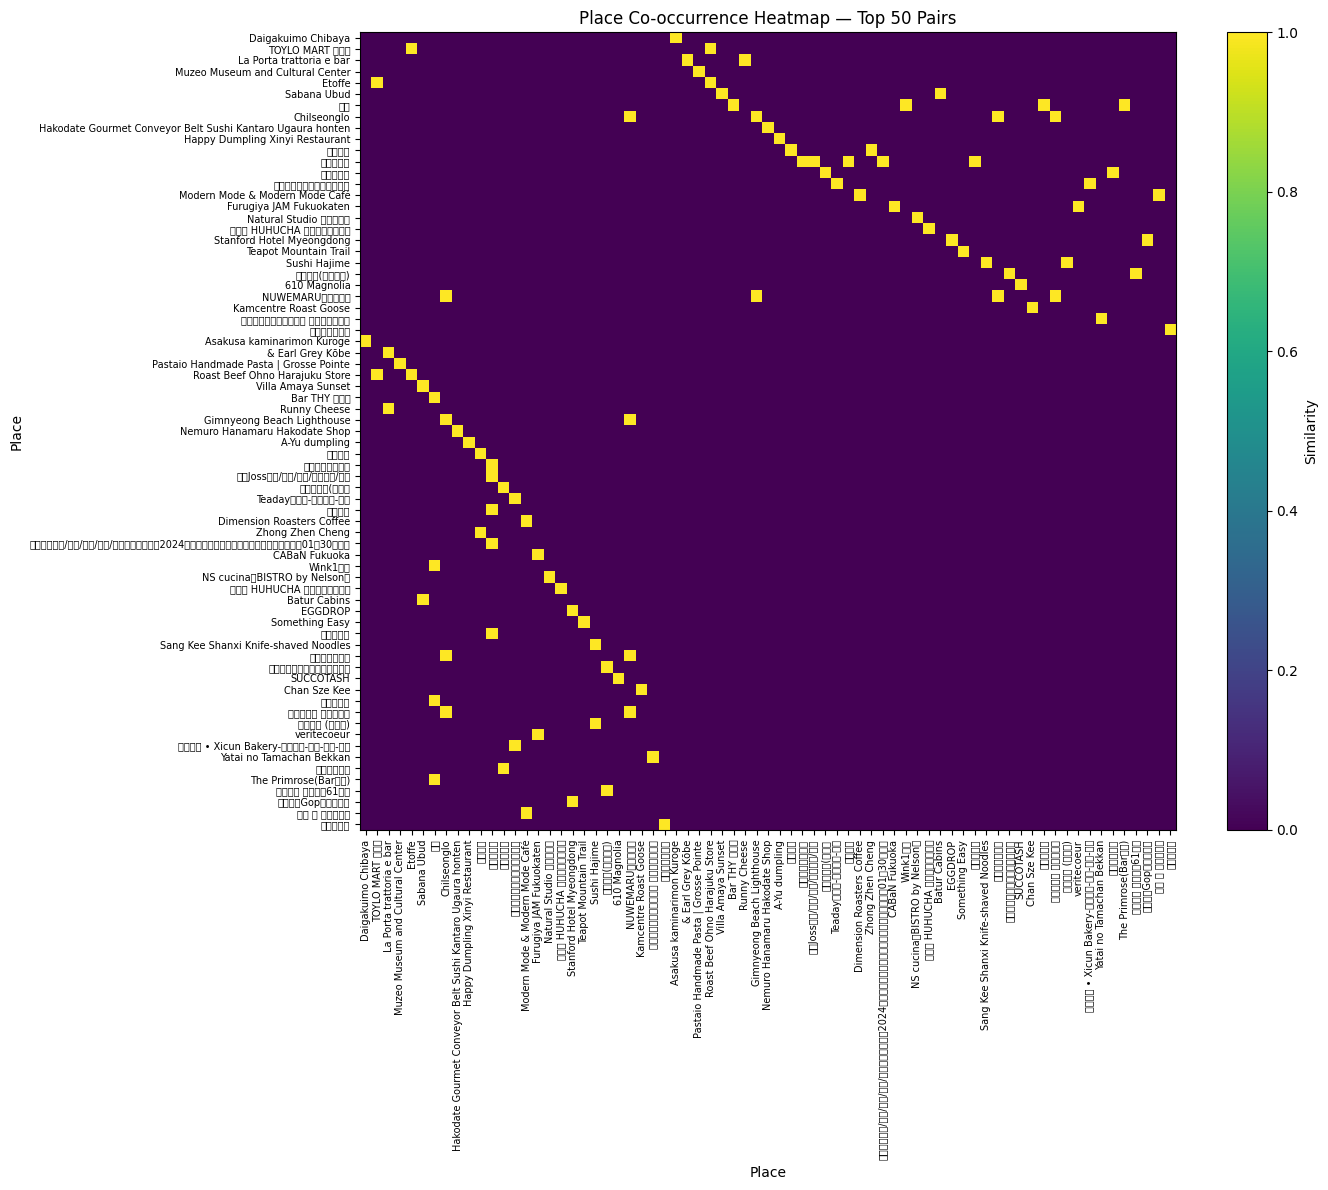

In [0]:
pairs_pdf = spark.table("top_place_pairs").toPandas()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

places = pd.unique(pairs_pdf[["place_a_name", "place_b_name"]].values.ravel("K"))
places = list(places)

mat = pd.DataFrame(0.0, index=places, columns=places)

for _, r in pairs_pdf.iterrows():
    a = r["place_a_name"]
    b = r["place_b_name"]
    s = float(r["similarity"])
    mat.loc[a, b] = s
    mat.loc[b, a] = s

plt.figure(figsize=(14, 12))
plt.imshow(mat.values, aspect="auto")
plt.title("Place Co-occurrence Heatmap — Top 50 Pairs")
plt.xlabel("Place")
plt.ylabel("Place")
plt.xticks(range(len(mat.columns)), mat.columns, rotation=90, fontsize=7)
plt.yticks(range(len(mat.index)), mat.index, fontsize=7)
plt.colorbar(label="Similarity")
plt.tight_layout()
plt.show()


Place Network Graph

In [0]:
%sql
CREATE OR REPLACE TEMP VIEW top50_places AS
WITH place_savers AS (
  SELECT DISTINCT place_id, user_id
  FROM olap_import.interactions
  WHERE place_id IS NOT NULL AND user_id IS NOT NULL
)
SELECT
  p.id AS place_id,
  p.english_display_name AS place_name,
  p.country_code,
  COUNT(*) AS savers_cnt
FROM place_savers ps
JOIN olap_import.places p ON ps.place_id = p.id
GROUP BY p.id, p.english_display_name, p.country_code
ORDER BY savers_cnt DESC
LIMIT 50;

In [0]:
%sql
CREATE OR REPLACE TEMP VIEW top50_place_pairs AS
WITH place_savers AS (
  SELECT DISTINCT place_id, user_id
  FROM olap_import.interactions
  WHERE place_id IS NOT NULL AND user_id IS NOT NULL
),
top_places AS (
  SELECT place_id FROM top50_places
),
filtered_savers AS (
  SELECT ps.place_id, ps.user_id
  FROM place_savers ps
  JOIN top_places tp ON ps.place_id = tp.place_id
),
place_user_counts AS (
  SELECT place_id, COUNT(*) AS savers_cnt
  FROM filtered_savers
  GROUP BY place_id
),
place_pairs AS (
  SELECT
    a.place_id AS place_a_id,
    b.place_id AS place_b_id,
    COUNT(*)   AS co_savers
  FROM filtered_savers a
  JOIN filtered_savers b
    ON a.user_id = b.user_id
   AND a.place_id < b.place_id
  GROUP BY a.place_id, b.place_id
),
place_pairs_scored AS (
  SELECT
    pp.place_a_id,
    pp.place_b_id,
    pp.co_savers,
    pp.co_savers / (ca.savers_cnt + cb.savers_cnt - pp.co_savers) AS similarity
  FROM place_pairs pp
  JOIN place_user_counts ca ON pp.place_a_id = ca.place_id
  JOIN place_user_counts cb ON pp.place_b_id = cb.place_id
)
SELECT
  place_a_id,
  place_b_id,
  co_savers,
  ROUND(similarity, 4) AS similarity
FROM place_pairs_scored;


In [0]:
import networkx as nx
import matplotlib.pyplot as plt

nodes_pdf = spark.table("top50_places").toPandas()

edges_pdf = (spark.table("top50_place_pairs")
             .filter("similarity >= 0.30")
             .toPandas())

G = nx.Graph()

# Add nodes with attributes
for _, r in nodes_pdf.iterrows():
    G.add_node(
        int(r["place_id"]),
        name=r["place_name"],
        country=r["country_code"],
        savers=int(r["savers_cnt"])
    )

# Add edges with weight = similarity
for _, r in edges_pdf.iterrows():
    a = int(r["place_a_id"])
    b = int(r["place_b_id"])
    if a in G and b in G:
        G.add_edge(a, b, weight=float(r["similarity"]))

print("Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())


Nodes: 50 Edges: 37


/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26371 (\N{CJK UNIFIED IDEOGRAPH-6703}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21654 (\N{CJK UNIFIED IDEOGRAPH-5496}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21857 (\N{CJK UNIFIED IDEOGRAPH-5561}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24307 (\N{CJK UNIFIED IDEOGRAPH-5EF3}) missin

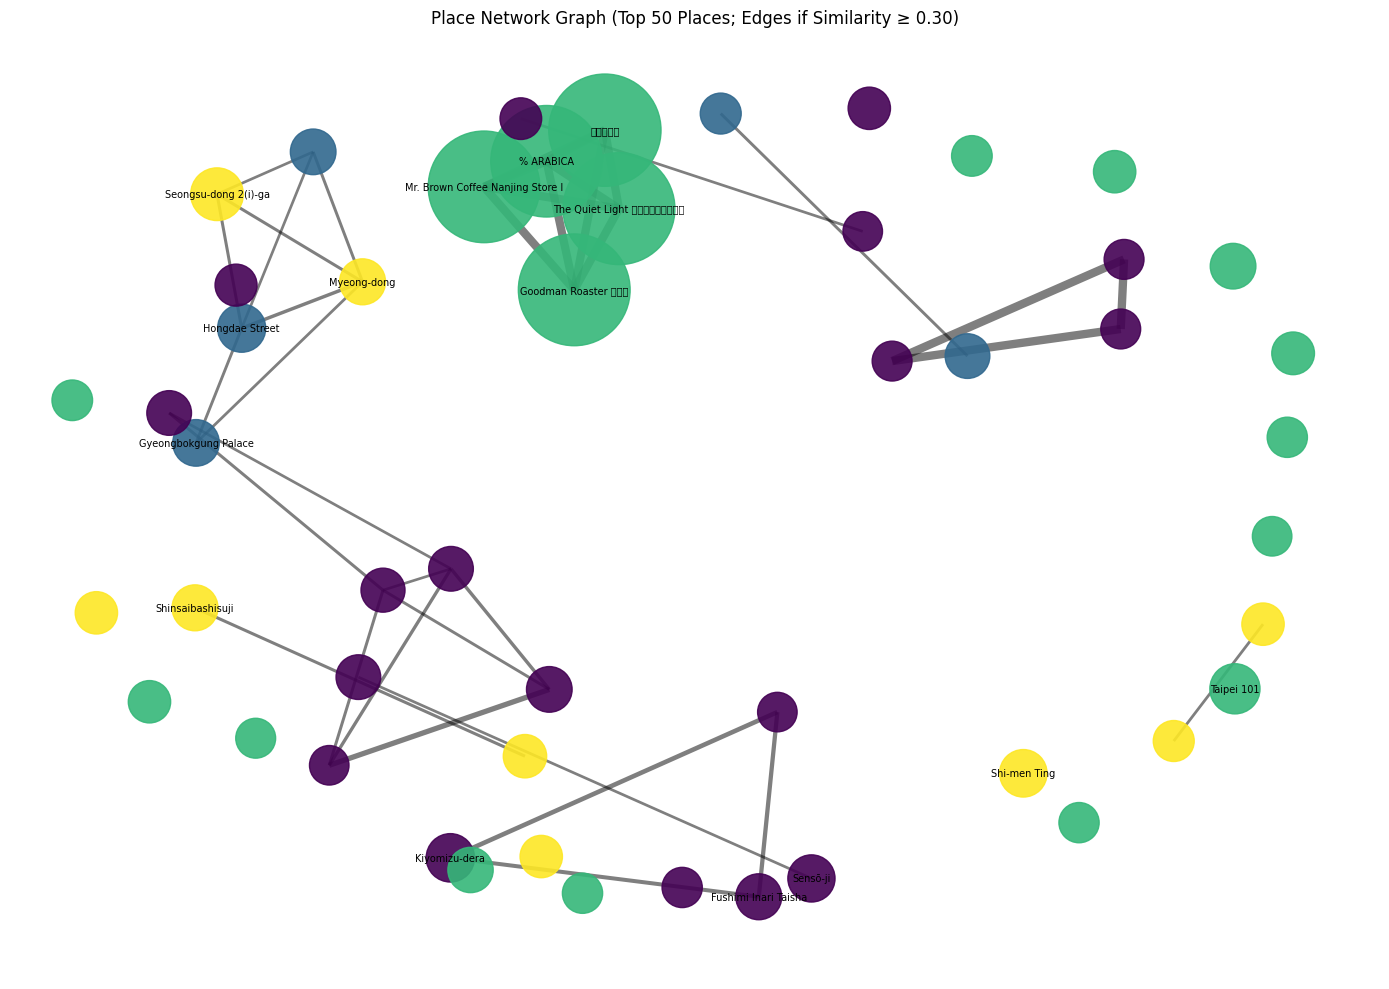

Country color mapping: {'JP': 0, 'KR': 1, 'TW': 2, 'UNKNOWN': 3}


In [0]:
pos = nx.spring_layout(G, seed=42, k=0.6)

# node sizes
sizes = [G.nodes[n]["savers"] for n in G.nodes()]
size_scale = 15
node_sizes = [s * size_scale for s in sizes]

# colors by country (map country -> integer)
countries = [
    G.nodes[n].get("country") if G.nodes[n].get("country") is not None else "UNKNOWN"
    for n in G.nodes()
]
country_list = sorted(set(countries))
country_to_int = {c:i for i,c in enumerate(country_list)}
node_colors = [country_to_int[c] for c in countries]

# edge widths by similarity
edge_weights = [G[u][v]["weight"] for u,v in G.edges()]
edge_widths = [w * 6 for w in edge_weights]  # scale

plt.figure(figsize=(14, 10))
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

# labels: optional (can get cluttered); label only larger nodes
labels = {n: G.nodes[n]["name"] for n in G.nodes() if G.nodes[n]["savers"] >= nodes_pdf["savers_cnt"].quantile(0.7)}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=7)

plt.title("Place Network Graph (Top 50 Places; Edges if Similarity ≥ 0.30)")
plt.axis("off")
plt.tight_layout()
plt.show()

# legend for countries
print("Country color mapping:", country_to_int)
